## Lecture 5: Input and Output

Topic coverage: 
 
* Review, Q&A
* Input/Output
    * Reading from the prompt
    * Reading from the command line
    * File input/output
    * Common binary formats

    
Based on the material developed by Jennifer Barnes for Phys77, Spring '16

## Announcements

The grades for homework 1 and workshop 2 have been released. Please consult the syllabus for the procedure to follow if you spot issues with your grades.

My offices hours this week will be on Friday (1 October) at 1 pm and next week on Monday (4 October) at 9:30 am on zoom: https://berkeley.zoom.us/j/99219769879?pwd=T0VsUEM1Q2dRRXh2S2VveXA1QzRzdz09

Please remember that you need to have a green campus badge to come to class and workshops in person. If you are have symptoms or know you've been exposed, please don't come to class or workshops and send me a message on slack. Course material and recordings will be available on bcourses and please connect to office hours on zoom with any questions.

Another reminder: the primary method of communication for this course is slack. Please send me a message on slack rather than an email or a message in bcourses.

## Recap from last time

## Plotting with Matplotlib

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

We went over only a few examples. Documentation and examples are available at https://matplotlib.org/ . In particular, my favorite -- examples: https://matplotlib.org/stable/gallery/index.html(make sure to cite in your code)

### Line attributes

![Line styles](../../Week04/linestyles.png)

### Colors

Huge range of colors in python! Here is the full table, but you can also just start with the base colors: b, g, r, c, m, y, k, w


![Colors](XKCD_Colors.png)



### Markers

![Filled markers](../../Week04/filledmarkers.png)
![Unfilled markers](../../Week04/unfilledmarkers.png)

See (http://matplotlib.org/) for more details

## Sub-plots

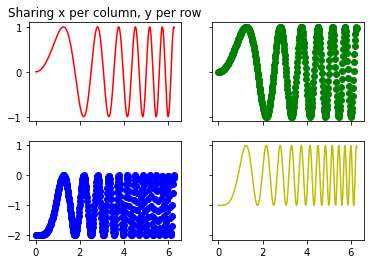

In [20]:
import matplotlib.pyplot as plt 
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'r')
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
ax4.plot(x, 2 * y ** 2 - 1, 'y')


## Input and Output

Most of the time, your code will need to process external data -- either entered by a human (through a keyboard), or read from external media. *This is an example of abstraction*: you write generic code that is kept separately from the data. The same is true for the data generated by your code. You may want to display it on the screen or store it in a file.

Let's look at some basic examples

### Keyboard prompt

In [ ]:
s = input('What is your name ? ')
print(len(s))
print (type(s), "Hello,", s)

You may want to convert strings to numerical types in order to perform calculations. See 

In [ ]:
age = input('What is your age ? ')
print (type(age))
number = int(age)
print (type(number), number)
nextYear = number+1
print('Next year you will be',nextYear)


This code may fail (see examples) if the user inputs something that can't be parsed as an integer. `Exception handling` can allow you to catch errors and recover. See the following example, where we will loop until the user enters correctly parsable number

In [ ]:
failed = True
while failed:
    age = input('What is your age ? ')
    try:
        number = int(age)
        print (type(number), number)
        nextYear = number+1
        print('Next year you will be',nextYear)
        failed = False
    except:
        print('Try again: please enter an integer value')
        failed = True
        
print('Success !')

Slightly more flexible (but also more dangerous) way to do conversion is to use <tt>eval()</tt>

In [ ]:
import numpy as np
x = 5
age = input('What is your age ? ')
number = eval(age)
print (type(number))
print('You are',number,'years old')

Most often, you would want to enter several values and parse them. Use string method *split()*:
But pay attention: the parsing is pretty rudimantary ! (examples)

In [ ]:
s = input('Enter coordinates (x,y,z):')
print(s)
[x,y,z] = s.split(',')
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))

Sometimes you would want to convert to float or int immediately, so can use list comprehension:

In [ ]:
s = input('Enter coordinates (x,y,z):')
mylist = s.split(',')
print(mylist)
print(type(mylist))
print(type(mylist[0]))

#listOfFloats = [float(var) for var in mylist]
#print(listOfFloats)

[x,y,z] = [float(var) for var in mylist]
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))
print('x squared = ',x**2)

### Reading and writing files

In [ ]:
%pylab inline

### Part I: ASCII files

Think of ASCII files as text files. ASCII stands for American Standard Code for Information Interchange -- which developed standards for encoding text and control information in files as far back as 1967. These standards are still in use today. 

You can open them using a text editor (like vim or emacs in Unix, Notepad in Windows, or TextEdit on a Mac) and read the information they contain directly. There are a few ways to produce these files, and to read them once they've been produced. In Python, the simplest way is to use file objects. 

Let's give it a try. We create a file object by calling the function `open( filename, access_mode )` and assigning its return value to a variable (usually `f`). This variable is often called a "file descriptor", or a "handle". It keeps information about the current state of the file, and also allows operating on the file, e.g. for reading or writing. 

The argument `filename` just specifices the name of the file we're interested in, and `access_mode` tells Python what we plan to do with that file:  
   * 'r': read the file  
   * 'w': write to the file (creates a new file, or clears an existing file)
   * 'a': append the file  
     
Note that both arguments should be strings.
For full syntax and special arguments, see documentation at https://docs.python.org/3/library/functions.html#open

In [21]:
f = open( 'welcome.txt', 'w' )
print(f)    # see what we got

<_io.TextIOWrapper name='welcome.txt' mode='w' encoding='UTF-8'>


In [22]:
f.write('One more line\n')
f.write('And another\n')

12

A note of caution: as soon as you call `open()`, Python creates a new file with the name you pass to it. Python will overwrite existing files if you open a file of the same name in write ('`w`') mode.

Now we can write to the file using `f.write( thing_to_write )`. We can write anything we want, but it must be formatted as a string.

In [23]:
topics = ['Data types', 'Loops', 'Functions', 'Arrays', 'Plotting', 'Statistics', 'Cats']

In [24]:
f.write( 'Welcome to Physics 77, Spring 2021\n' ) # the newline command \n tells Python to start a new line
f.write( 'Topics we will learn about include:\n' )
for top in topics:
    f.write( top + '\n')
f.close()                                         # don't forget this part!

Now go to your directory on datahub (or local computer) and look for this file.
You can also use Jupyter/iPython magic commands to examine the contents:

In [ ]:
%cat welcome.txt

We can then read the data back out again:

In [ ]:
f = open( 'welcome.txt', 'r' )    # note that we reused the handle
print(f)

In [ ]:
for line in f:
    print (line.strip())
    #print(line.upper())
    #print(line)       # see the difference ? 
f.close()

There are also shortcuts available, if we only want to read in some of the data:

In [ ]:
f = open( 'welcome.txt', 'r' )
for i in range(4):
    f.readline() # skip the first two lines
topicList = [line.strip() for line in f]
#topicList = [line for line in f]
f.close()
print (len(topicList))
print (topicList)

Python reads in spacing commands from files as well as strings. The `.strip()` just tells Python to ignore those spacing commands. What happens if you remove it from the code above?

What can you do if you want to add a few more items to a file that already has data and you don't want to overwrite it?

In [25]:
f = open( 'welcome.txt', 'a' )
print(f)    # see what we got

<_io.TextIOWrapper name='welcome.txt' mode='w' encoding='UTF-8'>


In [27]:
f.write( 'Neural networks\n' ) # the newline command \n tells Python to start a new line
f.close()

#### Numerical data

For the most part, our text files will contain numeric information, not strings. These can be somewhat trickier to read in. Let's read in a file produced in another program, that contains results from a BaBar experiment, where we searched for a "dark photon" produced in e+e- collisions [https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.119.131804, https://arxiv.org/abs/1702.03327]. The data are presented in two columns: 

  mass charge
  
First, let's peek into the file using iPython magic (direct interface to Unix operating system):

In [ ]:
%cat BaBar_2016.dat   

Now let's read the file into python data structures

In [ ]:
fname = 'BaBar_2016.dat'
f = open(fname, 'r')
# read each line, split the data wherever there's a blank space,
# and convert the values to floats
mass = []
charge = []
for line in f:
    m, c = [float(dat) for dat in line.split()]
    mass.append(m)
    charge.append(c)
f.close()

print('Read',len(mass),'lines from file',fname)

We got it; let's plot it!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mass, charge, 'r-' )
plt.xlim(0, 8)
plt.ylim(0, 3e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

If only there were an easier way!

Fortunately, Python's `numpy` library has functions for converting file information into numpy arrays, which can be easily analyzed and plotted. The above can be accomplished with a lot less code (and a lot less head scratching!)

The two most common functions to read a tabulated text are numpy's `loadtxt` and `genfromtxt`. They are subtly different and mostly interchangable.The most useful feature of `genfromtxt` is that it is able to assign default values to missing fields. See https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html and https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

In [ ]:
import numpy as np
mass, charge = np.genfromtxt('BaBar_2016.dat', unpack = True)
print(type(mass))
plt.plot(mass, charge,'r-')
plt.xlim(0, 8)
plt.ylim(0, 2e-3)
plt.xlabel('mass (GeV)')
plt.ylabel('charge, 90% C.L. limit')
plt.show()

### Part II: CSV

CSV stands for Comma Separated Values. Python's `csv` module allows easy reading and writing of sequences. CSV is especially useful for loading data from spreadsheets and databases.

Let's make a list and write a file!  
First, we load the module

In [ ]:
import csv

Next, we create a file object that opens the file we want to write to.  
Then, we create a *csv writer*, a special object that is built specificly to write
sequences to our csv file.

In [ ]:
f_csv = open( 'nationData.csv', 'w' )
SAWriter = csv.writer( f_csv,                 # write to this file object
                           delimiter = ',',          # place comma between items we write
                           quotechar = '',           # Don't place quotes around strings
                           quoting = csv.QUOTE_NONE )# made up of multiple words 

Now let's write some data:

In [ ]:
countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',\
             'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
capitals = ['Buenos Aires', 'Sucre', 'Brasilia', 'Santiago', 'Bogota', 'Quito', 'Georgetown',\
             'Asuncion', 'Lima', 'Paramaribo', 'Montevideo', 'Caracas']
population_mils = [ 42.8, 10.1, 203.4, 16.9, 46.4, 15.0, 0.7, 6.5, 29.2, 0.5,\
                      3.3, 27.6]

In [ ]:
SAWriter.writerow(['Data on South American Nations'])
SAWriter.writerow(['Country', 'Capital', 'Population (millions)'])
for i in range(len(countries)):
    SAWriter.writerow( [countries[i], capitals[i], population_mils[i]] )
f_csv.close()

Now let's see if we can open your file using a spreadsheet program, like MS Excel. How did we do?

We can use a similar process to read data into Python from a csv file. Let's read in a list of the most populous cities and store them for analysis.

In [ ]:
cities = []
cityPops = []
metroPops = []

In [ ]:
f_csv = open( 'cities.csv', 'r')
readCity = csv.reader( f_csv, delimiter = ',' )
next(readCity) # skip the header row
for row in readCity:
#    print(row)
    print (', '.join(row)) # join the element of the list together, with the strng ', ' in between
    city_country = ', '.join(row[0:2])
    cities.append(city_country)
    if row[2] != '':
        cityPops.append( float(row[2]) )
    else: cityPops.append(-1)
    if row[3] != '':
        metroPops.append( float(row[3]) )
    else: metroPops.append(-1)
f_csv.close()

print(cityPops)

In [ ]:
metroPops, cityPops = np.array(metroPops), np.array(cityPops)
cIds = np.argsort(cityPops)[::-1] # sort in descending order
mIds= np.argsort(metroPops)[::-1]

print ("The five most populous cities (within city proper) are:\n")
for j in range(5):
        print (cities[cIds[j]], "with a population of {} million".format(cityPops[cIds[j]]))

print ("\nThe five most populous metropolitan regions in the world are:\n")
for i in range(5):
        print (cities[mIds[i]], "with a metro population of {} million".format(metroPops[mIds[i]]))


### Binary files

So far, we've been dealing with text files. If you opened these files up with a text editor, you could see what was written in them. Binary files are different. They're written in a form that Python (and other languages) understand how to read, but we can't access them directly.  The most common binary file you'll encounter in python is a *.npy* file, which stores numpy arrays. You can create these files using the command `np.save( filename, arr )`. That command will store the array `arr` as a file called filename, which should have the extension .npy. We can then reload the data with the command `np.load(filename)`

In [ ]:
x = np.linspace(-1.0, 1.0, 100)
y = np.sin(10*x)*np.exp(-x) - x
plt.plot(x,y,'r-')

In [ ]:
# save the array
xy = np.hstack((xy))
print(xy)
np.save('y_of_x.npy', xy )
print(len(xy))

Let's also save it as ascii:

In [ ]:
f = open('y_of_x.txt','w')
for var in xy:
    f.write('{0:.16f}\n'.format(var))
f.close()

In [ ]:
del x, y, xy # erase these variables from Python's memory

Now reload the data and check that you can use it just as before.

In [ ]:
xy = np.load('y_of_x.npy')
print (len(xy))
x = xy[:100]
y = xy[100:]
print (len(x),len(y))

plt.plot(x,y,'r-')

### HDF5 Files

HDF5 files are ideally suited for managing large amounts of complex data. Python can read them using the module `h5py.`

In [ ]:
import h5py

Let's load our first hdf5 file:

In [ ]:
fh5 = h5py.File( 'solar.h5py', 'r' )

hdf5 files are made up of data sets. Each data set has a name, or a key. Let's take a look at our data sets:

In [ ]:
for k in fh5.keys(): # loop through the keys
    print (k)

We access the data sets in our file by name:

In [ ]:
print(len(fh5["names"]))
for nm in fh5["names"]: # make sure to include the quotation marks!
    print (nm)

It looks like we've got some planet data on our hands!  
Names is a special case, in that it's elements are strings. The other data sets contain float values, and can be treated like numpy arrays.

In [ ]:
print (fh5["solar_AU"][:])

Let's make a plot of the solar system that shows each planet's:  
* distance from the sun (position on the x-axis)
* orbital period (position on the y-axis
* mass (size of scatter plot marker)
* surface temperature (color of marker)
* density (transparency (or alpha, in matplotlib language))

In [ ]:
distAU = fh5["solar_AU"][:]
mass = fh5["mass_earthM"][:]
torb = fh5["TOrbit_yr"][:]
temp = fh5["surfT_K"][:]
rho = fh5["density"][:]
names = fh5["names"][:]

In [ ]:
import numpy as np

def get_size( ms ):
    m = 400.0/(np.max(mass) - np.min(mass))
    return 100.0 + (ms - np.min(mass))*m 
def get_alpha( p ):
    m = .9/(np.max(rho)-np.min(rho))
    return .1+(p - np.min(rho))*m

In [ ]:
alfs = get_alpha(rho)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

norm = mpl.colors.Normalize(vmin=np.min(temp), vmax=np.max(temp))
cmap = plt.cm.cool
m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(1)
for i in range(8):
    ax.scatter( distAU[i], torb[i], s = get_size(mass[i]), color = m.to_rgba(temp[i]), alpha=alfs[i] ) 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.1,200)
ax.set_ylabel( 'orbital period (y)' )
ax.set_xlabel( 'average dist. from sun (AU)' )
ax.set_title( 'Our solar system' )
plt.show()

If you ever want to write your own HDF5 file, you can open an h5py file object by calling:  

    fh5 = h5py.File('filename.h5py', 'w')  
    
Data sets are created with

    dset = fh5.create_dataset( "dset_name", (shape,))
    
The default data type is float.  
The values for the data set are then set with:  

    dset[...] = (  )  
    
where the parenthesis contain an array or similar data of the correct shape. After you've added all your data sets, close the file with  

    fh5.close()  
If you have extra time, try creating your own data set and read it back in to verify that you've done it correctly!

### Pandas

There are more sophisticated tools to store and process the data. We will look at Pandas example in a workshop

### Direct binary reads

There is also a more direct, less polished interface for reading data from a file:

In [ ]:
f = open('BaBar_2016.dat', 'r')    # open file for reading
#f.write('Try me\n')
s = f.readline()             # read one line (including end-of-line character, '\n')
print (s)                      # print it

In [ ]:
s2 = f.readline()            # this will now read the second line
print (s2)

In [ ]:
f = open('BaBar_2016.dat', 'rb') # opening the file again will reset the handle to the beginning of the file.NB: binary mode !
f.seek(5)                  # skip 5 bytes (5 characters)
s2 = f.readline()          # read from that point until the end of the line
print (s2)                 # notice trancation 
f.seek(-25, 2)             # go back 15 bytes from the current position (i.e. beginning of next line)
s2 = f.readline()          # notice what is read
print (s2)